In [37]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import datetime

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

Set up or initial dataframe by removing variable and transforming others.

In [17]:
df = pd.read_csv('kc_house_data_train.csv')
df.rename(columns = {'Unnamed: 0': 'index'}, inplace = True)
df.set_index('index', inplace = True)

def new_string(number):
    
    new_string = df.date[number].replace("T000000",'')
    
    new_string =  new_string[:4] + "-" + new_string[4:]
    
    new_string =  new_string[:7] + "-" + new_string[7:]
    
    return new_string

def into_time(string):
    return datetime.datetime.strptime(string, "%Y-%m-%d")

df['sold_time'] = [into_time(i) for i in [new_string(i) for i in range(len(df))]]
df['years_ago_sold'] = abs(pd.DatetimeIndex(df['sold_time']).year - 2021)

df = df.drop(['sold_time','date', 'id','zipcode'], axis = 1)


In [34]:
target = df.price
df_features = df.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)

In [35]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [36]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 205806.5988387578


Evaluate on the test set

In [23]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 207293.8397622301
Training:  205806 vs. Testing:  207293


/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


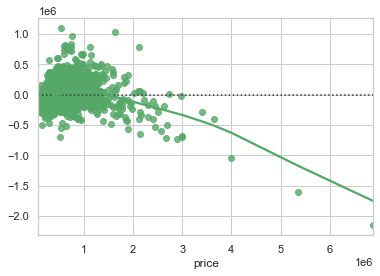

In [25]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g");